# 전체 데이터셋 생성

### 환경설정

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle
import os

import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

### 데이터 불러오기 

In [31]:
data_dir = r'C:\Users\a0105\Desktop\DSC\ddd\preprocessing/'

filenames = os.listdir(data_dir)
print(filenames)

['feed.rds', 'final_data.pkl', 'huns_final_data.pkl', 'hun_data.pkl', 'usbeer_merge.pkl', '가축사육현황merge.pkl', '경제성장률merge.pkl', '관측정보_merge.pkl', '수입현황merge.pkl', '전체 data.pkl', '축산물_공휴일.pkl']


In [32]:
with open(data_dir+'usbeer_merge.pkl', 'rb') as f:
    usbeef = pickle.load(f)

with open(data_dir+'가축사육현황merge.pkl', 'rb') as f:
    livestock = pickle.load(f)
    
with open(data_dir+'경제성장률merge.pkl', 'rb') as f:
    economic = pickle.load(f)
    
with open(data_dir+'관측정보_merge.pkl', 'rb') as f:
    weather = pickle.load(f)

with open(data_dir+'수입현황merge.pkl', 'rb') as f:
    import_df = pickle.load(f)
    
# 공휴일과 축산물에 관한 값이 함께 있음 
with open(data_dir+'축산물_공휴일.pkl', 'rb') as f:
    price_ts = pickle.load(f)

In [33]:
print(usbeef.shape)
print(livestock.shape)
print(economic.shape)
print(weather.shape)
print(import_df.shape)
print(price_ts.shape)

(298, 3)
(298, 21)
(298, 16)
(298, 11)
(298, 8)
(298, 5)


In [34]:
# livestock 주간날짜 칼럼 -> datetime형태로 바꿔주기
livestock['주간날짜'] = pd.to_datetime(livestock['주간날짜'])

### usbeef 가격 데이터+ 한우가격(y값)

In [35]:
usbeef.head
print(usbeef.columns)

Index(['주간날짜', '한우 평균경매 금액_주간평균', 'price'], dtype='object')


In [36]:
# price -> 생산량_주간평균으로 대체
usbeef = usbeef.rename(columns={'price':'미국소_생산량(가격화한값)'})

In [37]:
del usbeef['한우 평균경매 금액_주간평균']

In [38]:
# 한우 평균경매금액_주간평균 소숫점 2째자리까지만 남기기
usbeef_df = usbeef.copy()
usbeef_df.head(2)

,주간날짜,미국소_생산량(가격화한값)
0,2013-01-06,226130.0
1,2013-01-13,226130.0


### livestock(가축사육현황) 데이터 + 한우가격(y값)

In [39]:
# 모든 칼럼 다 보기
pd.options.display.max_columns = 22
livestock.head()

,연도,월,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수),날짜,번식우 아닌 소,"마리 수 중 1세 미만(암,수) 제외","번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),분기,주간날짜,한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,year,month
0,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888,1,2013-01-06,13875.600000,3044.800000,2013,1
1,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888,1,2013-01-13,13213.333333,2984.000000,2013,1
2,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888,1,2013-01-20,12588.833333,2904.000000,2013,1
3,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888,1,2013-01-27,12323.833333,2959.666667,2013,1
4,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888,1,2013-02-03,12325.166667,2862.833333,2013,2


In [40]:
# 필요한 칼럼
columns = ['주간날짜','번식우 아닌 소 중 1세 미만(암,수) 제외','1~2세(모든 소)']

livestock_df = livestock[columns]


In [41]:
livestock_df.head()

,주간날짜,"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소)
0,2013-01-06,520,888
1,2013-01-13,520,888
2,2013-01-20,520,888
3,2013-01-27,520,888
4,2013-02-03,520,888


### economic(경제성장률) 데이터 + 한우가격(y값)

In [42]:
economic.head()

,연도,국내총생산(GDP)(당해년 가격) (10억US$),1인당 GDP(당해년 가격) (달러),GDP 성장률 (%),수출 (100만달러),수입 (100만달러),총인구 (천명),실업률 (%),소비자물가지수 (2010=100),조강생산량 (1000M/T),인터넷 이용률 (%),주간날짜,한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,year,month
0,2013.0,1370,27178,3,559632,515586,50429,3,98,66061,84,2013-01-06,13875.600000,3044.800000,2013,1
1,2013.0,1370,27178,3,559632,515586,50429,3,98,66061,84,2013-01-13,13213.333333,2984.000000,2013,1
2,2013.0,1370,27178,3,559632,515586,50429,3,98,66061,84,2013-01-20,12588.833333,2904.000000,2013,1
3,2013.0,1370,27178,3,559632,515586,50429,3,98,66061,84,2013-01-27,12323.833333,2959.666667,2013,1
4,2013.0,1370,27178,3,559632,515586,50429,3,98,66061,84,2013-02-03,12325.166667,2862.833333,2013,2


- <소>
    - [양의 상관관계]
        * 국내총생산 0.58 
        * 1인당 gdp 0.55  
        * 총인구 0.79 
        * 소비자물가지수 0.71  
        * 인터넷이용률 0.77  
        * 돼지탕박가격 0.46

    - [음의 상관관계]
        * gdp성장률 -0.59  
        * 수입 -0.53  


- <돼지>- 소와의 가격관계
    - [양의 상관관계]
        * 한우가격 0.46

In [43]:
# 필요한 칼럼 
columns = ['주간날짜','수출 (100만달러)','수입 (100만달러)','소비자물가지수 (2010=100)']

economic_df = economic[columns]
economic_df.head(2)

,주간날짜,수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100)
0,2013-01-06,559632,515586,98
1,2013-01-13,559632,515586,98


### import_df(수입소고기 수입현황) 데이터 + 한우가격(y값)

In [44]:
import_df.columns

Index(['주간날짜', '한우 평균경매 금액_주간평균', '돼지 탕박 경매 금액_주간평균', 'year', 'month',
       'frozen', 'refrigeration', 'total'],
      dtype='object')

In [45]:
# 필요한 칼럼 
columns = ['주간날짜','total']

import_df = import_df[columns]
import_df.head(2)

,주간날짜,total
0,2013-01-06,28623
1,2013-01-13,28623


In [46]:
# total 칼럼명 바꾸기
import_df = import_df.rename(columns={'total':'수입소고기_총량'})
import_df.head(2)

,주간날짜,수입소고기_총량
0,2013-01-06,28623
1,2013-01-13,28623


### price_ts

In [47]:
price_ts['한우 경매 예상 두수_주간평균'].value_counts()

0.0      157
765.0     30
44.0       6
416.0      3
813.0      3
        ... 
714.0      1
735.0      1
497.0      1
489.0      1
753.0      1
Name: 한우 경매 예상 두수_주간평균, Length: 93, dtype: int64

In [48]:
price_ts.isnull().sum()

주간날짜                0
한우 평균경매 금액_주간평균     0
돼지 탕박 경매 금액_주간평균    0
한우 경매 예상 두수_주간평균    0
명절유무                0
dtype: int64

### weather(날씨 관측 데이터) - EDA 더 필요!?

In [49]:
# year, month 칼럼제거
weather_df = weather.drop(['year','month'], axis=1)
weather_df.head(2)

,주간날짜,한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%)
0,2013-01-06,13875.600000,3044.8,-0.3,-4.6,5.4,-2.5,16.0,29.6
1,2013-01-13,13213.333333,2984.0,1.4,-2.2,6.1,0.0,30.0,49.6


In [50]:
weather_df = weather_df.drop(['한우 평균경매 금액_주간평균', '돼지 탕박 경매 금액_주간평균'],axis=1)
weather_df.head(2)

,주간날짜,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%)
0,2013-01-06,-0.3,-4.6,5.4,-2.5,16.0,29.6
1,2013-01-13,1.4,-2.2,6.1,0.0,30.0,49.6


날씨 데이터가 폐사의 여부를 알기 위해 사용하고자 수집한 데이터이지만 가축관리에 날씨는 영향을 미치기 때문에 해당 값 자체를 변수로 사용하여 모델링에 적용해보고자함.

---

## 데이터 병합

- 우선 더 EDA가 진행되지 않은 관측데이터(weather_df변수)인 상태에서 병합해봄
- 향후 관측데아터의 추가적인 EDA 실시 후 feature selection 필요

In [51]:
from functools import reduce

In [52]:
dfs = [usbeef_df, economic_df, import_df,weather_df,livestock_df, price_ts]

df_final = reduce(lambda left, right: pd.merge(left, right, on='주간날짜'), dfs)

In [53]:
df_final.head()

,주간날짜,미국소_생산량(가격화한값),수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,한우 경매 예상 두수_주간평균,명절유무
0,2013-01-06,226130.0,559632,515586,98,28623,-0.3,-4.6,5.4,-2.5,16.0,29.6,520,888,13875.600000,3044.800000,0.0,0
1,2013-01-13,226130.0,559632,515586,98,28623,1.4,-2.2,6.1,0.0,30.0,49.6,520,888,13213.333333,2984.000000,0.0,0
2,2013-01-20,226130.0,559632,515586,98,28623,1.5,-2.2,2.7,0.1,40.0,64.9,520,888,12588.833333,2904.000000,0.0,0
3,2013-01-27,226130.0,559632,515586,98,28623,3.8,-0.9,9.3,0.4,40.0,63.0,520,888,12323.833333,2959.666667,0.0,1
4,2013-02-03,187340.0,559632,515586,98,18241,1.5,-1.9,4.5,0.8,22.0,48.4,520,888,12325.166667,2862.833333,0.0,1


In [54]:
with open('final_data.pkl', 'wb') as f:
    pickle.dump(df_final, f)

# 상관관계

C:\Users\a0105\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\a0105\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


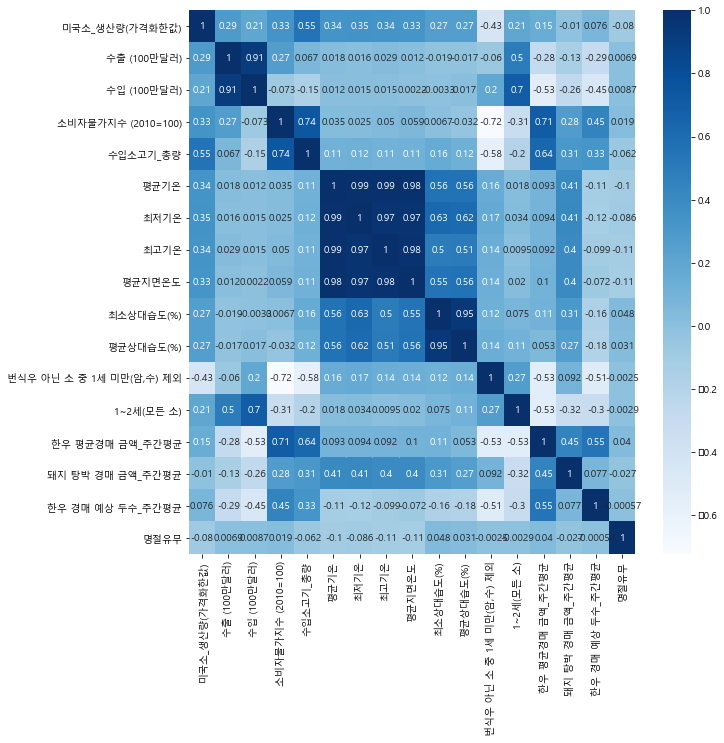

In [55]:
corr_data = df_final.drop(["주간날짜"], axis=1)
corr = corr_data.corr()

plt.figure(figsize=(10,10))

sns.heatmap(data = corr, annot=True, cmap='Blues')

* '번식우 아닌 소 중 1세 미만(암, 수)제외' & '1~2세(모든 소)' 변수는 각각 -0.53으로 음의 상관관계를 보이고 있음
* '미국소_생산량(가격화한값)' 변수는 0.15로 약한 양의 상관관계를 보이고 있음.
* '돼지 탕박 경매 금액_주간평균' 0.46으로 양의 상관관계를 보이고 있음.
* '수입(100만달러)' 변수는 -0.53으로 음의 상관관계를 보이고 있지만 수입소고기_총량은 0.64로 양의 상관관계를 보이고 있음.
* 기온 관련 변수 모두 매우 약한 상관관계를 보이고 있고 최소상대습도가 0.11로 그나마 높음. 
* 한우 경매 예상 두수와 한우 평균경매 금액_주간평균의 상관관계는 0.55로 양의 상관관계를 나타냄

In [56]:
df_final.shape

(298, 18)

In [57]:
df_final

,주간날짜,미국소_생산량(가격화한값),수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,한우 경매 예상 두수_주간평균,명절유무
0,2013-01-06,226130.0,559632,515586,98,28623,-0.3,-4.6,5.4,-2.5,16.0,29.6,520,888,13875.600000,3044.800000,0.0,0
1,2013-01-13,226130.0,559632,515586,98,28623,1.4,-2.2,6.1,0.0,30.0,49.6,520,888,13213.333333,2984.000000,0.0,0
2,2013-01-20,226130.0,559632,515586,98,28623,1.5,-2.2,2.7,0.1,40.0,64.9,520,888,12588.833333,2904.000000,0.0,0
3,2013-01-27,226130.0,559632,515586,98,28623,3.8,-0.9,9.3,0.4,40.0,63.0,520,888,12323.833333,2959.666667,0.0,1
4,2013-02-03,187340.0,559632,515586,98,18241,1.5,-1.9,4.5,0.8,22.0,48.4,520,888,12325.166667,2862.833333,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,2018-08-19,242960.0,604860,535202,104,42590,25.1,21.3,27.9,26.2,54.0,72.4,486,887,16835.000000,5305.000000,108.5,0
294,2018-08-26,242960.0,604860,535202,104,42590,23.2,20.9,27.2,24.5,54.0,77.4,486,887,17555.000000,5207.500000,250.0,0
295,2018-09-02,215750.0,604860,535202,104,34151,22.4,19.6,25.9,24.4,40.0,60.1,486,887,18369.000000,5548.000000,443.0,0
296,2018-09-09,215750.0,604860,535202,104,34151,19.4,16.0,23.3,22.1,62.0,77.3,486,887,18757.000000,5754.000000,449.0,1


### 소 개체 수 추출 변수 수정

* 가임암소수가 증가할수록 한우 가격이 떨어진다고 함 -> 번식우를 변수로 사용 
* 출하월령이 다가온 소들을 1세 이상 소라고 가정하고 이들 중 번식우를 제외한 값을 변수로 사용 

In [67]:
live = pd.read_csv(r'C:\Users\a0105\Desktop\DSC\ddd\data\02. 가축사육현황.csv', encoding='cp949')

In [68]:
live.dtypes

Unnamed: 0     int64
연도             int64
월              int64
마리수           object
번식우           object
1세미만(암)        int64
1세미만(수)        int64
1~2세(암)        int64
1~2세(수)        int64
2세이상(암)       object
2세이상(수)        int64
dtype: object

In [69]:
live['번식우'] = live['번식우'].replace(',','',regex=True)
live['2세이상(암)'] = live['2세이상(암)'].replace(',','',regex=True)

live['번식우'] = live['번식우'].astype('int')
live['2세이상(암)'] = live['2세이상(암)'].astype('int')

In [70]:
live.dtypes

Unnamed: 0     int64
연도             int64
월              int64
마리수           object
번식우            int32
1세미만(암)        int64
1세미만(수)        int64
1~2세(암)        int64
1~2세(수)        int64
2세이상(암)        int32
2세이상(수)        int64
dtype: object

In [71]:
live['번식우가 아닌 소'] = live['1세미만(암)']+live['1~2세(암)']+live['2세이상(암)']-live['번식우']
live['번식우가 아닌 소']

live['번식우_no'] = live['2세이상(수)']+live['1~2세(수)']+live['번식우가 아닌 소']
live['번식우_no']

0     293
1     288
2     278
3     265
4     248
     ... 
75    854
76    800
77    873
78    889
79    858
Name: 번식우_no, Length: 80, dtype: int64

In [72]:
def convert_quarter(month):
    if 1 <= month <= 3:
        return 1
    elif 3 < month <= 6:
        return 2
    elif 6 < month <= 9:
        return 3
    else:
        return 4

In [73]:
df_final

,주간날짜,미국소_생산량(가격화한값),수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,한우 경매 예상 두수_주간평균,명절유무
0,2013-01-06,226130.0,559632,515586,98,28623,-0.3,-4.6,5.4,-2.5,16.0,29.6,520,888,13875.600000,3044.800000,0.0,0
1,2013-01-13,226130.0,559632,515586,98,28623,1.4,-2.2,6.1,0.0,30.0,49.6,520,888,13213.333333,2984.000000,0.0,0
2,2013-01-20,226130.0,559632,515586,98,28623,1.5,-2.2,2.7,0.1,40.0,64.9,520,888,12588.833333,2904.000000,0.0,0
3,2013-01-27,226130.0,559632,515586,98,28623,3.8,-0.9,9.3,0.4,40.0,63.0,520,888,12323.833333,2959.666667,0.0,1
4,2013-02-03,187340.0,559632,515586,98,18241,1.5,-1.9,4.5,0.8,22.0,48.4,520,888,12325.166667,2862.833333,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,2018-08-19,242960.0,604860,535202,104,42590,25.1,21.3,27.9,26.2,54.0,72.4,486,887,16835.000000,5305.000000,108.5,0
294,2018-08-26,242960.0,604860,535202,104,42590,23.2,20.9,27.2,24.5,54.0,77.4,486,887,17555.000000,5207.500000,250.0,0
295,2018-09-02,215750.0,604860,535202,104,34151,22.4,19.6,25.9,24.4,40.0,60.1,486,887,18369.000000,5548.000000,443.0,0
296,2018-09-09,215750.0,604860,535202,104,34151,19.4,16.0,23.3,22.1,62.0,77.3,486,887,18757.000000,5754.000000,449.0,1


In [75]:
df_final['주간날짜'] = df_final['주간날짜'].dt.strftime('%Y%m%d')

df_final["연도"] = df_final["주간날짜"].apply(lambda x : str(x)[:4])
df_final["분기"] = df_final["주간날짜"].apply(lambda x : convert_quarter(int(x[4:6])))
live["분기"] = live["월"].apply(lambda x : convert_quarter(int(x)))
print("====livestock status target data=====")

====livestock status target data=====


In [94]:
df_final['연도'] =df_final['연도'].astype('int')
data = pd.merge(df_final,live[['연도','분기','번식우','번식우_no']],how='left',on=['연도','분기'])
data

,주간날짜,미국소_생산량(가격화한값),수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,한우 경매 예상 두수_주간평균,명절유무,연도,분기,번식우,번식우_no
0,20130106,226130.0,559632,515586,98,28623,-0.3,-4.6,5.4,-2.5,16.0,29.6,520,888,13875.600000,3044.800000,0.0,0,2013,1,1580,916
1,20130113,226130.0,559632,515586,98,28623,1.4,-2.2,6.1,0.0,30.0,49.6,520,888,13213.333333,2984.000000,0.0,0,2013,1,1580,916
2,20130120,226130.0,559632,515586,98,28623,1.5,-2.2,2.7,0.1,40.0,64.9,520,888,12588.833333,2904.000000,0.0,0,2013,1,1580,916
3,20130127,226130.0,559632,515586,98,28623,3.8,-0.9,9.3,0.4,40.0,63.0,520,888,12323.833333,2959.666667,0.0,1,2013,1,1580,916
4,20130203,187340.0,559632,515586,98,18241,1.5,-1.9,4.5,0.8,22.0,48.4,520,888,12325.166667,2862.833333,0.0,1,2013,1,1580,916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,20180819,242960.0,604860,535202,104,42590,25.1,21.3,27.9,26.2,54.0,72.4,486,887,16835.000000,5305.000000,108.5,0,2018,3,1758,904
294,20180826,242960.0,604860,535202,104,42590,23.2,20.9,27.2,24.5,54.0,77.4,486,887,17555.000000,5207.500000,250.0,0,2018,3,1758,904
295,20180902,215750.0,604860,535202,104,34151,22.4,19.6,25.9,24.4,40.0,60.1,486,887,18369.000000,5548.000000,443.0,0,2018,3,1758,904
296,20180909,215750.0,604860,535202,104,34151,19.4,16.0,23.3,22.1,62.0,77.3,486,887,18757.000000,5754.000000,449.0,1,2018,3,1758,904


In [95]:
data

,주간날짜,미국소_생산량(가격화한값),수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,한우 경매 예상 두수_주간평균,명절유무,연도,분기,번식우,번식우_no
0,20130106,226130.0,559632,515586,98,28623,-0.3,-4.6,5.4,-2.5,16.0,29.6,520,888,13875.600000,3044.800000,0.0,0,2013,1,1580,916
1,20130113,226130.0,559632,515586,98,28623,1.4,-2.2,6.1,0.0,30.0,49.6,520,888,13213.333333,2984.000000,0.0,0,2013,1,1580,916
2,20130120,226130.0,559632,515586,98,28623,1.5,-2.2,2.7,0.1,40.0,64.9,520,888,12588.833333,2904.000000,0.0,0,2013,1,1580,916
3,20130127,226130.0,559632,515586,98,28623,3.8,-0.9,9.3,0.4,40.0,63.0,520,888,12323.833333,2959.666667,0.0,1,2013,1,1580,916
4,20130203,187340.0,559632,515586,98,18241,1.5,-1.9,4.5,0.8,22.0,48.4,520,888,12325.166667,2862.833333,0.0,1,2013,1,1580,916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,20180819,242960.0,604860,535202,104,42590,25.1,21.3,27.9,26.2,54.0,72.4,486,887,16835.000000,5305.000000,108.5,0,2018,3,1758,904
294,20180826,242960.0,604860,535202,104,42590,23.2,20.9,27.2,24.5,54.0,77.4,486,887,17555.000000,5207.500000,250.0,0,2018,3,1758,904
295,20180902,215750.0,604860,535202,104,34151,22.4,19.6,25.9,24.4,40.0,60.1,486,887,18369.000000,5548.000000,443.0,0,2018,3,1758,904
296,20180909,215750.0,604860,535202,104,34151,19.4,16.0,23.3,22.1,62.0,77.3,486,887,18757.000000,5754.000000,449.0,1,2018,3,1758,904


In [96]:
data = data.drop(['분기','연도','번식우 아닌 소 중 1세 미만(암,수) 제외','1~2세(모든 소)'],axis=1)

In [97]:
data['평균지면온도'] = data['평균지면온도'].fillna(method = 'pad')
data['주간날짜'] = pd.to_datetime(data['주간날짜'])

In [98]:
data2 = data.copy()

In [99]:
data2

,주간날짜,미국소_생산량(가격화한값),수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,한우 경매 예상 두수_주간평균,명절유무,번식우,번식우_no
0,2013-01-06,226130.0,559632,515586,98,28623,-0.3,-4.6,5.4,-2.5,16.0,29.6,13875.600000,3044.800000,0.0,0,1580,916
1,2013-01-13,226130.0,559632,515586,98,28623,1.4,-2.2,6.1,0.0,30.0,49.6,13213.333333,2984.000000,0.0,0,1580,916
2,2013-01-20,226130.0,559632,515586,98,28623,1.5,-2.2,2.7,0.1,40.0,64.9,12588.833333,2904.000000,0.0,0,1580,916
3,2013-01-27,226130.0,559632,515586,98,28623,3.8,-0.9,9.3,0.4,40.0,63.0,12323.833333,2959.666667,0.0,1,1580,916
4,2013-02-03,187340.0,559632,515586,98,18241,1.5,-1.9,4.5,0.8,22.0,48.4,12325.166667,2862.833333,0.0,1,1580,916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,2018-08-19,242960.0,604860,535202,104,42590,25.1,21.3,27.9,26.2,54.0,72.4,16835.000000,5305.000000,108.5,0,1758,904
294,2018-08-26,242960.0,604860,535202,104,42590,23.2,20.9,27.2,24.5,54.0,77.4,17555.000000,5207.500000,250.0,0,1758,904
295,2018-09-02,215750.0,604860,535202,104,34151,22.4,19.6,25.9,24.4,40.0,60.1,18369.000000,5548.000000,443.0,0,1758,904
296,2018-09-09,215750.0,604860,535202,104,34151,19.4,16.0,23.3,22.1,62.0,77.3,18757.000000,5754.000000,449.0,1,1758,904


C:\Users\a0105\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\a0105\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


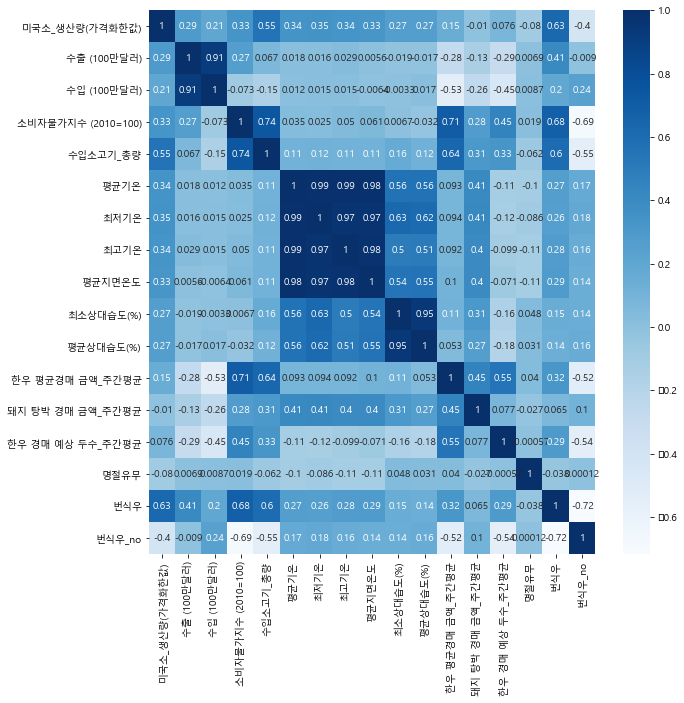

In [100]:
corr_data = data2.drop(["주간날짜"], axis=1)
corr = corr_data.corr()

plt.figure(figsize=(10,10))

sns.heatmap(data = corr, annot=True, cmap='Blues')

In [101]:
data2.to_pickle(r'C:\Users\a0105\Desktop\DSC\ddd\preprocessing\전체_data.pkl')